In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
print(keras.__version__)
from keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from keras.models import Model
from keras.optimizers import SGD, Adam

2.3.1


Using TensorFlow backend.


In [3]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-06-26 14:30:13--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  26.2MB/s    in 7.9s    

2020-06-26 14:30:21 (23.9 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [4]:
# Unzip
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [5]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [7]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [8]:
N = len(set(user_ids))
M = len(set(movie_ids))

In [9]:
print(N)
print(M)

138493
26744


In [10]:
#Set embedding Dimension
K = 10

In [18]:
# Neural Network

# user input
u = Input(shape=(1,))

#movie input
m = Input(shape=(1,))

#User Embedding
u_emb = Embedding(N, K)(u)  #output is (num_samples, 1, K)

#Movie Embedding
m_emb = Embedding(M, K)(m) #output is (num_samples, 1, K)

#Flatten both the embeddings
u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

#Concatenate user-move into a new feature vector
x = Concatenate()([u_emb, m_emb]) #now it's a (num_samples, 2K)

#Now that we have a feature vector, it's just a regular ANN
x = Dense(1024, activation='relu')(x)
x = Dense(400, activation='relu')(x)
x = Dense(400, activation='relu')(x)
x = Dense(1)(x)

In [12]:
#Build the model and compile
model  = Model(inputs=[u, m], outputs=x)
model.compile(loss='mse', optimizer=SGD(learning_rate=0.08, momentum=0.9),)

In [15]:
#split the data
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings))

train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

#center the ratings
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 10)        1384930     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 10)        267440      input_2[0][0]                    
____________________________________________________________________________________________

In [20]:
r = model.fit(
    x=[train_user, train_movie],
    y=train_ratings,
    epochs=25,
    batch_size=1024,
    verbose=2,
    validation_data=([test_user, test_movie], test_ratings),
)

Train on 16000210 samples, validate on 4000053 samples
Epoch 1/25
 - 52s - loss: 0.5326 - val_loss: 0.6289
Epoch 2/25
 - 53s - loss: 0.5313 - val_loss: 0.6283
Epoch 3/25
 - 51s - loss: 0.5302 - val_loss: 0.6318
Epoch 4/25
 - 52s - loss: 0.5291 - val_loss: 0.6319
Epoch 5/25
 - 51s - loss: 0.5280 - val_loss: 0.6300
Epoch 6/25
 - 51s - loss: 0.5269 - val_loss: 0.6296
Epoch 7/25
 - 51s - loss: 0.5261 - val_loss: 0.6303
Epoch 8/25
 - 51s - loss: 0.5252 - val_loss: 0.6318
Epoch 9/25
 - 50s - loss: 0.5243 - val_loss: 0.6317
Epoch 10/25
 - 51s - loss: 0.5235 - val_loss: 0.6303
Epoch 11/25
 - 50s - loss: 0.5227 - val_loss: 0.6325
Epoch 12/25
 - 50s - loss: 0.5220 - val_loss: 0.6303
Epoch 13/25
 - 50s - loss: 0.5213 - val_loss: 0.6332
Epoch 14/25
 - 50s - loss: 0.5206 - val_loss: 0.6361
Epoch 15/25
 - 50s - loss: 0.5200 - val_loss: 0.6361
Epoch 16/25
 - 51s - loss: 0.5193 - val_loss: 0.6343
Epoch 17/25
 - 50s - loss: 0.5186 - val_loss: 0.6358
Epoch 18/25
 - 50s - loss: 0.5181 - val_loss: 0.6367


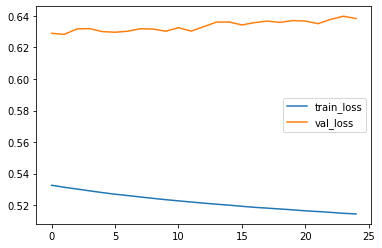

In [21]:
#plot losses
plt.plot(r.history['loss'], label="train_loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [22]:
np.sqrt(0.6259)

0.7911384202527394

In [23]:
model.save('systemRecommend.h5')